## Tracking Lost Indego Bikes in Philadelphia using Indego trips data (2016 - 2018)

#### Kefan Long -  Musa 620 Data Wrangling and Visualization Final Project
##### May 14, 2019




### Introduction

While bike share programs are becoming popular among Amerian major cities, most of them are having similar issues. Since these durable bikes are usually expensive and the users' charge is usually low, losing any bikes can be a huge loss to the program. This project focuses on the "missing" trips of bike share program. Philadelphia has its Indego bike program running for over 3 years and has all trips data open to public, therefore in this project I will be investigating and exploring a way of tracking those bikes that might be lost. To simplyfy this project, I mainly analyze the trips from 2016-01-01 to 2018-12-31.


### Content

This final project is a list of visualizations which analyzes the missing trips and alerts to users bikes that might be lost. For missing trips, I mainly refer to trips that has no end locations recorded. The reasons that the trip has no end location information varies. It may be because the bike is lost, but it can also be that the bike does not stop in an Indego bike station dock. If the bike is not in the dock, it can still be used if a user find it and the "missisng bikes" will be re-appear. Therefore, I will only mark a bike as "lost" after a bike in a "missing trip" does not appear in latter trips for over 7 days.

### Data and Visualization

The only data source I user for this project is the Indego bike data(i). Trip data is recorded by Indego and is released quarterly. I combined the data from the oldest 2015 q3 data to latest 2019 q1 data. The number of rows in combined dataset is around 2.4 million.

To make sure that users get a faster response from the app, I pre-processed the data and all data for visualization has already been generated and saved in thr folder.

1. 'vis1_missing_popup.csv'- Mainly used for popping up trips that have no end locations on the map 
2. 'vis2_lost_time.csv' - Mainly used for visualizing bikes still "missing" and corresponding hours of missing
3. 'vis3_lost_bike.json' - Mainly used for visualizing bikes that are lost by the stimestamp selected
4. 'vis3_stats.csv' - Mainly used for introductory graph that shows how many bikes have lost so far
5. 'vis4_lost_location.csv' - Mainly used for marker on maps which shows where the trips that lose bike start.

In this notebook, I tried to visualize the following:

1. A line graph shows how many bikes have been lost by time (1)
2. A map shows where "missing trips" tend to happen (5) 
3. A map shows where new "lost bikes" possibly are (4)
4. A text shows newly increased bikes that are marked as lost during selected period (3)
5. A bar graph shows how many bikes are still missing and is not marked as "lost" (shown as gif) (2)

What I expected at first was that these visualizations would all be controlled by the selection of a period of time, which sound very easy to create a dashboard based on this. However, since most of my visualizations requires calculations between rows, and most data are on the level of hours, it is kind out of my current ability to build a dashboard that connects different datasets and running animated visualizations at the same time. There are no APIs where I can directly request data in a clean and neat way.  Therefore, I visualized separately on all elements that I want to appear on my conceptualized dashboard and also draw a simplified layout design of the dashboard.

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import holoviews as hv
import geoviews.tile_sources as gts
import param as pm
import panel as pn

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
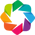

In [2]:
# Enable Altair and Holoviews renderings in the notebook
alt.renderers.enable('notebook') 
hv.extension('bokeh')

# Add the Vega extension for Panel
pn.extension('vega')

### Load all the datasets

In [3]:
vis1 = pd.read_csv('vis3_stats.csv',index_col = 0)
vis2 = pd.read_csv('vis1_missing_popup.csv',index_col = 0)
vis3 = pd.read_csv('vis4_lost_location.csv',index_col = 0)
vis4 = pd.read_csv('vis2_lost_time.csv',index_col = 0)
vis5 = pd.read_json('vis3_lost_bike.json')

C:\Users\Kevin Long\Anaconda3\envs\musa\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,6577,6579,6583,6584,6586,6587,6588,6589,6590,6591,6592,6593,6596,6608,6609,6610,6611,6612,6613,6615,6616,6618,6619,6620,6621,6624,6631,6632,6633,6634,6637,6638,6639,6641,6642,6643,6645,6647,6655,6657,6658,6659,6660,6664,6665,6666,6668,6669,6671,6679,6680,6681,6685,6686,6687,6689,6690,6691,6692,6693,6702,6703,6704,6705,6706,6707,6708,6709,6710,6712,6713,6714,6715,6716,6728,6729,6732,6733,6734,6735,6736,6737,6738,6739,6749,6751,6752,6755,6758,6766,6768,6778,6780,6781,6782,6784,6785,6787,6788,6797,6800,6801,6802,6803,6807,6808,6809,6810,6811,6812,6813,6814,6823,6825,6829,6830,6833,6834,6835,6836,6837,6846,6847,6848,6850,6851,6852,6854,6855,6856,6857,6858,6861,6865,6874,6875,6876,6881,6882,6883,6888,6898,6899,6900,6901,6904,6905,6906,6907,6910,6923,6924,6925,6926,6927,6930,6931,6933,6935,6945,6946,6947,6950,6951,6952,6953,6954,6957,6968,6969,6970,6975,6977,6978,6979,699

C:\Users\Kevin Long\Anaconda3\envs\musa\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940,6941,6942,6943,6944,6945,6946,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956,6957,6958,6959,6960,6961,696

C:\Users\Kevin Long\Anaconda3\envs\musa\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### General Introduction of Indego Lost Situations (visualization 1)

From what I counted from trip data, there are in totall over 1000 Indego bikes lost from 2016 to 2018. Based on the observations, the lost of public bikes starts from 2016 October. The number of lost bikes grows at the rate of 1 bike per day from 2016 Oct. to 2018 Oct. However, from last October, we have seen an average of 3 bikes lost per day. It may have something to do with increasing number of bikes in use or increasing number of trips, but it can also be that peole are becoming less careful using these bikes and do not follow the rules.

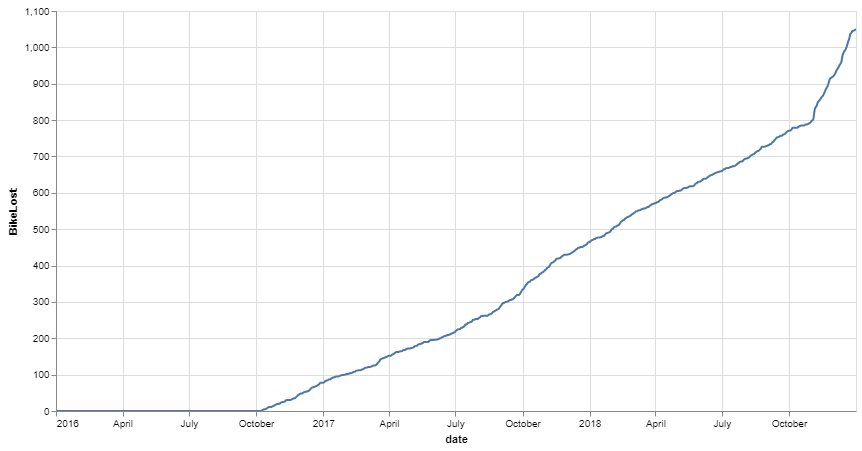

In [4]:
vis1_new = vis1.transpose().reset_index()
vis1_new.columns = ['date', 'BikeLost']
vis1_new['date'] = vis1_new['date'].apply(lambda x: x.split(' ')[0])
vis1_new = vis1_new.groupby('date').max().reset_index()

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

line = alt.Chart(vis1_new).mark_line(interpolate='basis').encode(
    x='date:T',
    y='BikeLost',
    tooltip = ["date","BikeLost"]
)
selectors = alt.Chart(vis1_new).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'BikeLost:Q', alt.value(' '))
)
rules = alt.Chart(vis1_new).mark_rule(color='red').encode(
    x='date:T',
).transform_filter(
    nearest
)
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=400
).interactive()

###  Select a list of date range for more visualization

In [6]:
import ipywidgets as w
from datetime import datetime
start_date = datetime(2016, 1, 1)
end_date = datetime(2019, 1, 1)

dates = pd.date_range(start_date, end_date, freq='H')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = w.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '900px'}
)

In [16]:
def get_date_range(date_range):
    return pd.date_range(date_range[0], date_range[1], freq='H')
w.interact(
    get_date_range,
    date_range=selection_range_slider
);

interactive(children=(SelectionRangeSlider(description='Dates', index=(11304, 13962), layout=Layout(width='900…

In [17]:
# Get daterange
a = get_date_range(selection_range_slider.value).to_list()

### Based on Selection, visualize missing bikes and their time (visualization 2)

I select from the slider timeframe and create a list of bar graphs in seaborn to look at all bikes that is missing for no more than 7 days. They are under higher threat of permanent lost or are in higher risk of getting damaged, therefore the program owner could pay more attention to these bikes.

In [19]:
stringfy = [items.strftime('%Y-%m-%d %H') for items in a]

In [18]:
# fill in most of layout
# for i in range(len(stringfy)):
#     vis4_1 = vis4_new[[stringfy[i]]]
#     vis4_1[vis4_1[stringfy[0]] < 168]
vis4_new = vis4[stringfy]
vis4_1 = vis4_new[[stringfy[0]]]
text = vis4_1.columns[0]
vis4_1 = vis4_1[vis4_1[stringfy[0]] < 168].reset_index()
vis4_1.columns = ['ID','LostTime']


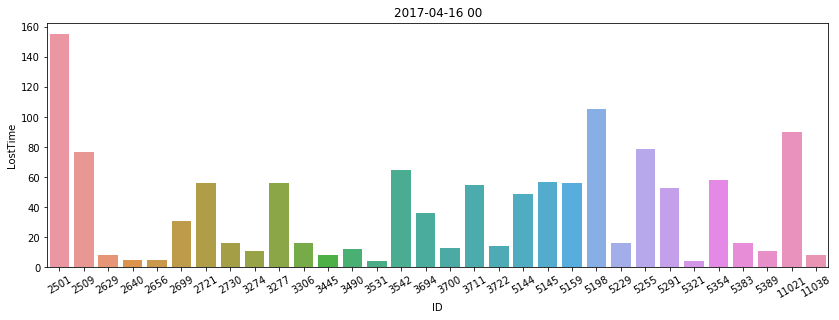

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 4.5))
plt.xticks(rotation=30)
ax = sns.barplot(x="ID", y="LostTime", data=vis4_1).set_title(text)

In [ ]:
# create a figure
import imageio

def plot_date(vis4_new, date):
    a = []
    a.append(date)
    vis4_1 = vis4_new[a]
    text = vis4_1.columns
    vis4_1 = vis4_1[vis4_1[a] < 168].reset_index()
    vis4_1.columns = ['ID','LostTime']
    
    plt.figure(figsize=(14, 4.5))
    plt.xticks(rotation=30)
    snsplot = sns.barplot(x="ID", y="LostTime", data=vis4_1).set_title(text)
    img = snsplot.get_figure()
    return img

imageio.mimsave('changing_by_time.gif', [plot_date(vis4_new, date) for date in stringfy], fps=10);

### Based on Datetime Selection, visualize missing trips (visualization 3)

I select from the slider timeframe and generate a short paragraph that comment on what happened in the past period. If a new bike went to the lost bike pool, remind the user about the situation.

In [ ]:
vis5.columns = [items.strftime('%Y-%m-%d %H') for items in vis5.columns]

In [88]:
## Finding newly lost bikes
for i in range(len(stringfy)-1):
    vis5_new1 = vis5[[stringfy[i]]]
    vis5_new2 = vis5[[stringfy[i+1]]]
    a = vis5_new1[pd.notnull(vis5_new1[stringfy[i]])]
    b = vis5_new2[pd.notnull(vis5_new2[stringfy[i+1]])]
    li1 = a.reset_index()['index'].to_list()
    li2 = b.reset_index()['index'].to_list()
    A = [item for item in li2 if item not in set(li1)]
    if len(A) > 0:
        print("From {} to {}, during this hour we lost {} for over 7 days.".format(stringfy[i],stringfy[i],A))

From 2017-04-16 12 to 2017-04-16 12, during this hour we lost ['2501'] for over 7 days.
From 2017-04-20 15 to 2017-04-20 15, during this hour we lost ['2721'] for over 7 days.
From 2017-04-20 16 to 2017-04-20 16, during this hour we lost ['3711'] for over 7 days.
From 2017-04-20 22 to 2017-04-20 22, during this hour we lost ['5144'] for over 7 days.
From 2017-04-22 07 to 2017-04-22 07, during this hour we lost ['3306'] for over 7 days.
From 2017-04-25 06 to 2017-04-25 06, during this hour we lost ['5380'] for over 7 days.
From 2017-04-25 15 to 2017-04-25 15, during this hour we lost ['3413'] for over 7 days.
From 2017-04-25 16 to 2017-04-25 16, during this hour we lost ['5184'] for over 7 days.
From 2017-04-27 16 to 2017-04-27 16, during this hour we lost ['5223'] for over 7 days.
From 2017-05-01 09 to 2017-05-01 09, during this hour we lost ['5303'] for over 7 days.
From 2017-05-03 17 to 2017-05-03 17, during this hour we lost ['5321'] for over 7 days.
From 2017-05-05 10 to 2017-05-05

### Based on Datetime Selection, mapping new lost bikes by their staring location(visualization 4)

After this whole period, plot the bikes that are marked as lost during this period on the map based on their last trip start coordinates. While it sound less likely they are around these start stations, it is useful for developer to seewhere these points are. 

In [148]:
vis3_new1 = vis3[[stringfy[0]]]
vis3_new2 = vis3[[stringfy[-1]]]
a1 = vis3_new1[pd.notnull(vis3_new1[stringfy[0]])].reset_index()
b1 = vis3_new2[pd.notnull(vis3_new2[stringfy[-1]])].reset_index()
a1.columns = b1.columns = ['bikeId','Location']
common = a1.merge(b1,on=['bikeId','Location'])
b2 = b1[(~b1.bikeId.isin(common.bikeId))&(~b1.Location.isin(common.Location))]

In [156]:
import geopandas as gpd
from shapely.geometry import Point
import folium

In [154]:
b2['lng'] = b2.apply(lambda row: row['Location'].split(', ')[1].split(': ')[1][:-1], axis = 1)
b2['lat'] = b2.apply(lambda row: row['Location'].split(', ')[0].split(': ')[1], axis = 1)
b2 = b2[b2['lat']!= 'nan']
b2['lat'] = pd.to_numeric(b2['lat'])
b2['lng'] = pd.to_numeric(b2['lng'])
b2['geometry'] = b2.apply(lambda row: Point(row['lat'],row['lng']), axis = 1)
crs = {'init':'epsg:3857'} #http://www.spatialreference.org/ref/epsg/2263/
b2 = gpd.GeoDataFrame(b2, crs=crs, geometry=b2['geometry'])

In [160]:
zip_url = "http://data.phl.opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
zip_codes = gpd.read_file(zip_url)
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb dark_matter',
    zoom_start=12
)

# add the GeoJson to the map
folium.GeoJson(
    zip_codes.to_json(),
    name='Philadelphia ZIP_codes',
    tooltip=folium.GeoJsonTooltip(['CODE'])
).add_to(m)

# add the GeoJson to the map
folium.GeoJson(
    b2.to_json(),
    name='Lost_bikes',
    tooltip=folium.GeoJsonTooltip(['bikeId'])
).add_to(m)


# also add option to toggle layers
folium.LayerControl().add_to(m)

m

In [162]:
print("Between {} and {}, there are {} bikes marked as newly lost, and their number includes: {} .".format(stringfy[0],stringfy[-1], len(b2), b2['bikeId'].to_list()))

Between 2017-04-16 00 and 2017-08-04 18, there are 34 bikes marked as newly lost, and their number includes: [2527, 2542, 2543, 2563, 2602, 2676, 2689, 2699, 3273, 3318, 3362, 3399, 3409, 3439, 3533, 3562, 3596, 3644, 3694, 3723, 5155, 5203, 5230, 5254, 5290, 5322, 5326, 5366, 6694, 11025, 11027, 11043, 11829, 11898] .


### Based on Datetime Selection, creat a heatmap visualizng all trips that end nowhere (visualization 5)

I select from the slider timeframe and collect all trips that end nowhere. Then I use a heatmap to plot out all trips on a folium map. Based on this heat map, we can easily see where the missing bike trips tend to happen, therefore it is easier for the program to see which areas requires more monitoring.

In [219]:
vis2_new = vis2[stringfy]
vis2_new = vis2_new.fillna(0)
a = []
for i, v in vis2_new.iterrows():
    for j in stringfy:
        if (v[j] != '0') | (v[j] != 0):
            a.append(v[j])
b = []
for i in a:
    if i != 0:
        b.append(i)

In [232]:
c = pd.DataFrame(b)
c.columns = ['location']
c['lat'] = c.apply(lambda row: row['location'].split(', ')[1].split(': ')[1][:-1], axis = 1)
c['lng'] = c.apply(lambda row: row['location'].split(', ')[0].split(': ')[1], axis = 1)
c = c[c['lat']!= 'nan']
c['lat'] = pd.to_numeric(c['lat'])
c['lng'] = pd.to_numeric(c['lng'])
c['geometry'] = c.apply(lambda row: Point(row['lat'],row['lng']), axis = 1)
crs = {'init':'epsg:3857'} #http://www.spatialreference.org/ref/epsg/2263/
c = gpd.GeoDataFrame(c, crs=crs, geometry=c['geometry'])

In [243]:
from folium.plugins import HeatMap
m = folium.Map(
    location=[39.96, -75.17],
    tiles='Cartodb Positron',
    zoom_start=13
)

heat_data = [[row['lat'],row['lng']] for index, row in c.iterrows()]
# add heat map
HeatMap(heat_data).add_to(m)

m

### Final Dashboard Conceptualized Design

I also designed the layout of the dashboard.

<img src="dashboard_visual.jpg" alt="Race Dot Map of Philadelphia" style="width: 900px;"/>